# A Three-Dimensional Hydrodynamic Model of Steady Corotating Solar Wind Streams

The MAS model can be simplified by neglecting all electromagnetic effects ($\mathbf{B}, \mathbf{J}, \mathbf{E}= 0)$, viscous forces ($\nu = 0$), energy source terms ($S=0$), and assuming a polytropic relation ($\frac{p}{\rho^{\gamma}} = \text{const.}$) along streamlines, such that we obtain a three-dimensional hydrodynamic inviscid polytropic model of the solar wind [pizzo 1979, pizzo 1980], i.e.
\begin{align} 
-\Omega_{\text{rot}} \frac{\partial \rho}{\partial \phi} + \nabla \cdot (\rho \boldsymbol{v}) &= 0, \label{pizzo1_steady} \\
\rho \left (-\Omega_{\text{rot}} \frac{\partial \boldsymbol{v}}{\partial \phi} + (\boldsymbol{v} \cdot \nabla )\boldsymbol{v} \right ) & = - \nabla p -\rho \frac{G M_{s}}{r^2}\hat{\mathbf{e}}_{r} \label{pizzo2_steady}\\
\left(-\Omega_{\text{rot}}\frac{\partial}{\partial \phi} + \boldsymbol{v} \cdot \nabla\right) \frac{p}{\rho^{\gamma}} &=0 \label{pizzo3_steady},
\end{align}
where $\rho(r, \theta, \phi)$ is the (proton) mass density, $\boldsymbol{v} = [v_{r}(r, \theta, \phi), v_{\theta}(r, \theta, \phi), v_{\phi}(r , \theta, \phi)]$ is the solar wind velocity, $p(r , \theta, \phi)$ is the solar wind pressure, $G$ is the gravitational constant, $M_{s}$ is the solar mass, $\hat{\mathbf{e}}_{r}$ is the unit vector in the radial direction, and $\gamma = \frac{5}{3}$ is the polytropic index. The independent variables are the spherical coordinates $(r, \theta, \phi)$ in heliographic (HG) coordinate system. The initial-boundary value problem (IBVP) is subject to the initial condition of the five dependent flow quantities $\rho, p, v_{r}, v_{\theta}, v_{\phi}$ on the $(\phi, \theta)$ plane at the inner boundary $r_{0} \geq 30 R_{S}$. The IBVP is defined on the periodic domain $0 \leq \phi \leq 2\pi$ and the latitudinal boundaries are treated as free-surfaces $\frac{\partial}{\partial \theta}|_{{\tiny \theta=0, \pi}} = 0$. The three equations conserve mass, momentum and polytropic constant, respectively. 

## Heliographic (rotating) coordinates
In HG coordinate system, the longitude axis co-rotates with the Sun, such that 
\begin{equation}
    \phi(t) = \phi_{0} - \Omega_{\text{rot}} t,
\end{equation}
where $\phi_{0}$ is the (non-rotating) longitude coordinate and $\Omega_{\text{rot}} = \frac{2\pi}{25.38} \frac{1}{\text{days}}$ is the angular frequency of the Sun (differential rotation is neglected). Therefore, the time derivatives can be expressed as spatial derivatives in the corotating frame via the chain rule, given that for any flow quantity $q$ in the non-rotating coordinate frame is described as $\tilde{q}$ in the rotating HG coordinate frame, i.e. $q(\phi_{0}, \theta, r, t) = \tilde{q}(\phi(t), \theta, r, t)$ such that
\begin{equation}
    \frac{\partial q}{\partial t} =  \frac{\partial \phi}{\partial t} \frac{\partial \tilde{q}}{\partial \phi} + \frac{\partial \tilde{q}}{\partial t} \frac{\partial t}{\partial t}=  -\Omega_{\text{rot}}\frac{\partial \tilde{q}}{\partial \phi} + \frac{\partial \tilde{q}}{\partial t}
\end{equation}
and
\begin{equation}
    \frac{\partial q}{\partial \phi_{0}} =  \frac{\partial \phi}{\partial \phi_{0}} \frac{\partial \tilde{q}}{\partial \phi} =  \frac{\partial \tilde{q}}{\partial \phi},
\end{equation}
Thus, this relation between the temporal and longitudinal gradients is valid for steady solar wind flow ($\frac{\partial \tilde{q}}{\partial t} = 0)$, i.e. flow that emanates from long-lived solar structures mainly during solar minimum. 

## Discretization via the Upwind Scheme
As derived in [Pizzo, 1979], The governing equations can be be rewritten by isolating the radial derivative terms, such that
\begin{equation}
    \frac{\partial}{\partial r} \mathbf{q}(r, \theta, \phi) = \mathbf{F}(\mathbf{q}, r) \cdot \frac{\partial }{\partial \theta} \mathbf{q}(r, \theta, \phi) + \mathbf{H}(\mathbf{q}, r, \theta) \cdot
    \frac{\partial}{\partial \phi} \mathbf{q}(r, \theta, \phi) + \mathbf{g}(\mathbf{q}, r, \theta),
\end{equation}
where the state vector is 
\begin{equation}
    \mathbf{q}(r, \theta, \phi) = \begin{pmatrix} 
		v_{r} \\ 
		\rho \\ 
		p\\
		v_{\phi}\\
		v_{\theta}
	\end{pmatrix} .
	\label{state-vector}
\end{equation}
The operators $\mathbf{H}$, $\mathbf{F}$, and the vector $\mathbf{g}$ are defined as 
\begin{equation}
    \mathbf{H}(\mathbf{q}, r, \theta)=
    \frac{-1}{\alpha^2 r \sin(\theta)} \begin{pmatrix} 
		u v_{r} & 0 & -\frac{u}{\rho} & -c_{s}^2 & 0 \\ 
		-\rho u & \frac{\alpha^2 u}{v_{r}}  & \frac{u}{v_{r}} &  \rho v_{r} & 0 \\ 
		-c_{s}^2 \rho u & 0 & u v_{r} & c_{s}^2 \rho v_{r} & 0 \\
		0 & 0 &  \frac{\alpha^2}{\rho v_{r}}&  \frac{\alpha^2 u}{v_{r}} & 0 \\
		0 & 0 & 0 & 0 & \frac{\alpha^2 u}{v_{r}}
	\end{pmatrix} 
	\label{H-matrix}
\end{equation}
and 
\begin{equation}
    \mathbf{F}(\mathbf{q}, r) = \frac{-1}{\alpha^2 r}
    \begin{pmatrix} 
		v_{\theta} v_{r} & 0 & -\frac{v_{\theta}}{\rho} & 0 & -c_{s}^2\\ 
		-\rho v_{\theta} & \frac{\alpha^2 v_{\theta}}{v_{r}}  & \frac{v_{\theta}}{v_{r}} & 0 & \rho v_{r} \\ 
		-c_{s}^2 \rho v_{\theta} & 0 & v_{\theta}v_{r} & 0 & c_{s}^2 \rho v_{r}\\
		0 & 0 & 0 & \frac{\alpha^2 v_{\theta}}{v_{r}} & 0 \\
		0 & 0 & \frac{\alpha^2}{\rho v_{r}} & 0 & \frac{\alpha^2 v_{\theta}}{v_{r}}
	\end{pmatrix} 
	\label{f-matrix}
\end{equation}
and 
\begin{equation}
    \mathbf{g}(\mathbf{q}, r, \theta) = \frac{1}{\alpha^2}
    \begin{pmatrix} 
		v_{r}c_{1} - \frac{c_{s}^2 c_{2}}{\rho} \\ 
		v_{r}c_{2} - \rho c_{1} \\ 
		c_{s}^2 v_{r} c_{2} - c_{s}^2 \rho c_{1}\\
		\frac{c_{4}}{v_{r}}\\
		\frac{c_{5}}{v_{r}}
	\end{pmatrix} ,
	\label{p-vector}
\end{equation}
where
\begin{equation}
     \begin{pmatrix} 
		c_{1} \\ 
		c_{2} \\ 
		c_{3} \\
		c_{4} \\
		c_{5}
	\end{pmatrix}  = \frac{1}{r}
    \begin{pmatrix} 
		v_{\theta}^2 + v_{\phi}^2 - 
		\frac{G M_{s}}{r} \\ 
		-2\rho v_{r} - \rho v_{\theta} \cot(\theta) \\ 
		0\\
		-v_{\theta} v_{r} - v_{\phi} v_{\theta} \cot(\theta)\\
		v_{\phi}^2 \cot(\theta) - v_{r} v_{\theta}
	\end{pmatrix} 
	\label{c-vector}
\end{equation}
and
\begin{align}
    \alpha^2 &= v_{r}^2 - c_{s}^2\\
    c_{s}^2 &= \gamma p/\rho\\
    u &= v_{\phi} - \Omega_{\text{rot}} r \sin(\theta).
\end{align}
In the region beyond $r \geq 30R_{S}$, the solar wind is supersonic and the governing equations are hyperbolic. The initial-value of the flow quantities $\mathbf{q}$ is given at the inner-boundary $r_{0}$ and is propagated out radially via the first-order upwind scheme (or forward Euler):
\begin{equation}
    \mathbf{q}^{n+1}_{i, j} = \mathbf{q}^{n}_{i, j} + \Delta r \left[\mathbf{F}^{n}_{i, j} \frac{\mathbf{q}^{n}_{i, j+1} - \mathbf{q}^{n}_{i, j}}{\Delta \theta} + \mathbf{H}^{n}_{i, j} \frac{\mathbf{q}^{n}_{i+1, j} - \mathbf{q}^{n}_{i, j}}{\Delta \phi} + \mathbf{g}^{n}_{i, j}\right].
\end{equation}
The superscript $n$ denotes the radial step index and the subscript $i, j$ denotes the longitude and latitude mesh indices, respectively. The respective mesh spacing of $r, \phi,\theta$ is denoted by $\Delta r, \Delta \phi, \Delta \theta$. 


In [1]:
import numpy as np
from tools.MASweb import get_mas_path
from psipy.model import MASOutput
from psipy.model.variable import Variable
from astropy.constants import m_p
from interpolation import interpolate_initial_condition
from functions_3d import pizzo_maccormack
import time
import astropy.units as u

In [2]:
import matplotlib.pyplot as plt
import matplotlib
font = {'family' : 'serif',
        'size'   : 14}

matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 

## Import MAS Coronal Data Carrington Rotation 2210 as Boundary Conditions at $30 R_{S}$

In [3]:
# mas output - br, rho, vr
cr = "2210"
mas_path = get_mas_path(cr=cr)
model = MASOutput(mas_path)
print(model.variables)

['bp', 'br', 'bt', 'p', 'rho', 't', 'vp', 'vr', 'vt']


In [4]:
p = np.linspace(model["vr"].phi_coords[0], model["vr"].phi_coords[-2], 300)
t = np.linspace(model["vr"].theta_coords[0], model["vr"].theta_coords[-1], 200)
r = (model["vr"].r_coords * (u.solRad)).to(u.km)
# delta phi
dp = p[1] - p[0]
# delta t
dt = t[1] - t[0]

In [5]:
# interpolate theta velocity to be on the same mesh grid. 
data_vt = interpolate_initial_condition(data=model["vt"].data, 
                                       p_coord=model["vt"].phi_coords, 
                                       t_coord=model["vt"].theta_coords, 
                                       r_coord=model["vt"].r_coords, 
                                       p_interp=p,
                                       t_interp=t,
                                       r_interp=model["vt"].r_coords)

data_vp = interpolate_initial_condition(data=model["vp"].data, 
                                       p_coord=model["vp"].phi_coords, 
                                       t_coord=model["vp"].theta_coords, 
                                       r_coord=model["vp"].r_coords, 
                                       p_interp=p,
                                       t_interp=t,
                                       r_interp=model["vp"].r_coords)

data_vr = interpolate_initial_condition(data=model["vr"].data, 
                                       p_coord=model["vr"].phi_coords, 
                                       t_coord=model["vr"].theta_coords, 
                                       r_coord=model["vr"].r_coords, 
                                       p_interp=p,
                                       t_interp=t,
                                       r_interp=model["vr"].r_coords)

data_rho = interpolate_initial_condition(data=model["rho"].data, 
                                       p_coord=model["rho"].phi_coords, 
                                       t_coord=model["rho"].theta_coords, 
                                       r_coord=model["rho"].r_coords, 
                                       p_interp=p,
                                       t_interp=t,
                                       r_interp=model["rho"].r_coords)

data_pr = interpolate_initial_condition(data=model["p"].data, 
                                       p_coord=model["p"].phi_coords, 
                                       t_coord=model["p"].theta_coords, 
                                       r_coord=model["p"].r_coords, 
                                       p_interp=p,
                                       t_interp=t,
                                       r_interp=model["p"].r_coords)

In [6]:
# save MHD mesh coordinates Heliographic (rotating) Coordinate System (HG)
# since the last phi index is less than 2*pi, then we will append 2*pi to phi scale.
p = np.append(p, 2*np.pi)

In [7]:
vr = data_vr
vr = np.append(vr,[vr[0, :, :]],axis=0)

vp = data_vp
vp = np.append(vp,[vp[0, :, :]],axis=0)

vt = data_vt
vt = np.append(vt,[vt[0, :, :]],axis=0)

rho = data_rho * m_p # convert to psi units
rho = (rho*(1/u.cm**3)).to(u.kg/u.km**3).value # convert to mks
rho = np.append(rho,[rho[0, :, :]],axis=0)

Pr = data_pr
Pr = (Pr*(u.dyne/u.cm**2)).to(u.kg/(u.s**2 * u.km)) # convert to mks
Pr = np.append(Pr,[Pr[0, :, :]],axis=0)

In [8]:
vt.shape

(301, 200, 141)

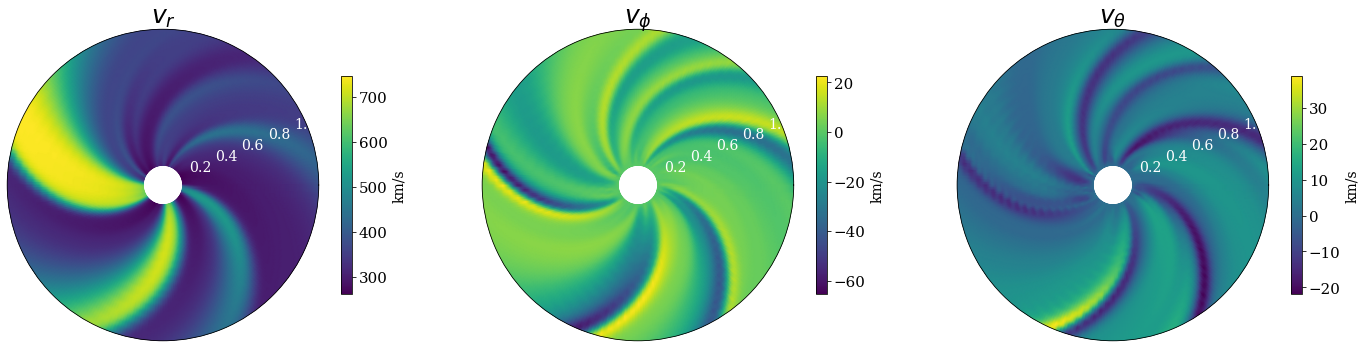

In [9]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5), subplot_kw={'projection': 'polar'})

ax[0].set_rlim(0)
ax[0].set_thetalim(0, 2 * np.pi)
ax[0].set_xticks([])
ax[0].set_ylim(0,1.1)
rlabels = ax[0].get_ymajorticklabels()
for label in rlabels:
    label.set_color('white')

pos = ax[0].pcolormesh(p, r.to(u.AU).value, vr[:, len(t)//2, :].T, shading='gouraud', cmap="viridis")
ax[0].set_title("$v_{r}$", fontsize=25)
cbar = fig.colorbar(pos, ax=ax[0], orientation="vertical", shrink=0.7)
cbar.ax.set_ylabel(r'km/s', rotation=90, fontsize=14)
cbar.ax.tick_params(labelsize=15)

ax[1].set_rlim(0)
ax[1].set_thetalim(0, 2 * np.pi)
ax[1].set_xticks([])
ax[1].set_ylim(0,1.1)
rlabels = ax[1].get_ymajorticklabels()
for label in rlabels:
    label.set_color('white')

pos = ax[1].pcolormesh(p, r.to(u.AU).value, vp[:, len(t)//2, 1:].T, shading='gouraud', cmap="viridis")
ax[1].set_title(r"$v_{\phi}$", fontsize=25)
cbar = fig.colorbar(pos, ax=ax[1], orientation="vertical", shrink=0.7)
cbar.ax.set_ylabel(r'km/s', rotation=90, fontsize=14)
cbar.ax.tick_params(labelsize=15)

ax[2].set_rlim(0)
ax[2].set_thetalim(0, 2 * np.pi)
ax[2].set_xticks([])
ax[2].set_ylim(0,1.1)
rlabels = ax[2].get_ymajorticklabels()
for label in rlabels:
    label.set_color('white')

pos = ax[2].pcolormesh(p, r.to(u.AU).value, vt[:, len(t)//2, 1:].T, shading='gouraud', cmap="viridis")
ax[2].set_title(r"$v_{\theta}$", fontsize=25)
cbar = fig.colorbar(pos, ax=ax[2], orientation="vertical", shrink=0.7)
cbar.ax.set_ylabel(r'km/s', rotation=90, fontsize=14)
cbar.ax.tick_params(labelsize=15)

plt.tight_layout()
plt.savefig("figs/three_velocities.png", dpi=600)

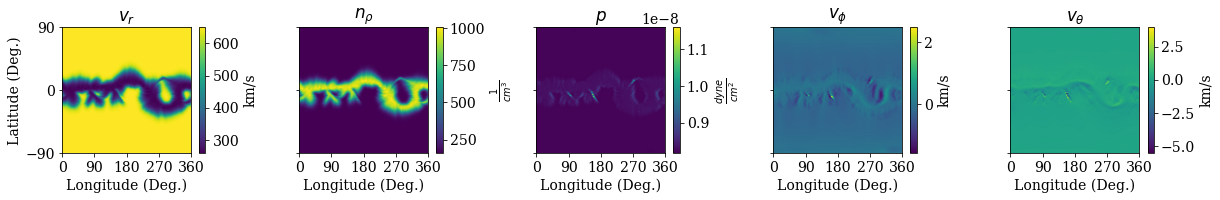

In [10]:
PHI, THETA = np.meshgrid(p, np.linspace(-np.pi/2, np.pi/2, len(t)))

fig, ax = plt.subplots(ncols=5, sharex=True, sharey=True, figsize=(17, 3))
pos = ax[0].pcolormesh(180 / np.pi * PHI, 180 / np.pi * THETA, 
                       vr[:, :, 0].T, shading='gouraud',
                       cmap="viridis")
cbar = fig.colorbar(pos, ax=ax[0])
cbar.ax.set_ylabel(r'km/s', rotation=90, fontsize=14)
ax[0].set_title(r"$v_{r}$")

pos = ax[1].pcolormesh(180 / np.pi * PHI, 180 / np.pi * THETA,
                       (rho[:, :,0].T/m_p.value*1/u.km**3).to(1/u.cm**3), shading='gouraud',
                       cmap="viridis")
cbar = fig.colorbar(pos, ax=ax[1])
cbar.ax.set_ylabel(r'$\frac{1}{cm^3}$', rotation=90, fontsize=14)
ax[1].set_title(r"$n_{\rho}$")

pos = ax[2].pcolormesh(180 / np.pi * PHI, 180 / np.pi * THETA,
                       (Pr[:, :, 0].T).to(u.dyne / u.cm**2),
                       shading='gouraud',
                       cmap="viridis")

cbar = fig.colorbar(pos, ax=ax[2])
cbar.ax.set_ylabel(r'$\frac{dyne}{cm^2}$', rotation=90, fontsize=14)
ax[2].set_title(r"$p$")

pos = ax[3].pcolormesh(180 / np.pi * PHI, 180 / np.pi * THETA, 
                       vp[:, :, 1].T, shading='gouraud',
                       cmap="viridis")

cbar = fig.colorbar(pos, ax=ax[3])
cbar.ax.set_ylabel(r'km/s', rotation=90, fontsize=14)
ax[3].set_title(r"$v_{\phi}$")

pos = ax[4].pcolormesh(180 / np.pi * PHI, 180 / np.pi * THETA, 
                       vt[:, :, 1].T, shading='gouraud',
                       cmap="viridis")
cbar = fig.colorbar(pos, ax=ax[4])

cbar.ax.set_ylabel(r'km/s', rotation=90, fontsize=14)
ax[4].set_title(r"$v_{\theta}$")

ax[4].set_xticks([0, 90, 180, 270, 360])
ax[4].set_yticks([-90, 0, 90])
ax[4].set_xlabel("Longitude (Deg.)")
ax[0].set_xlabel("Longitude (Deg.)")
ax[3].set_xlabel("Longitude (Deg.)")
ax[2].set_xlabel("Longitude (Deg.)")
ax[1].set_xlabel("Longitude (Deg.)")
ax[0].set_ylabel("Latitude (Deg.)")
plt.tight_layout()

plt.savefig("figs/boundary_conditions_at_30rs.png", dpi=600)

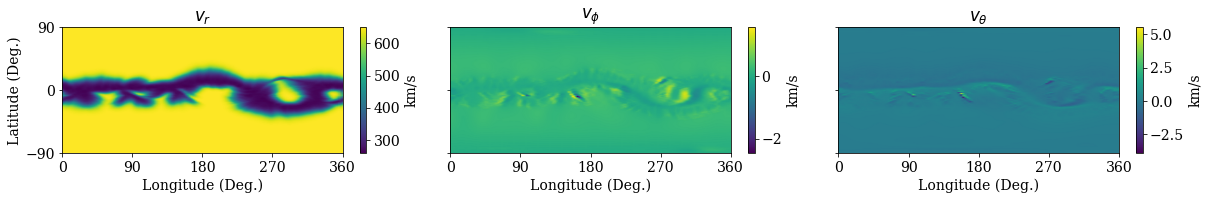

In [11]:
PHI, THETA = np.meshgrid(p, np.linspace(-np.pi/2, np.pi/2, len(t)))

fig, ax = plt.subplots(ncols=3, sharex=True, sharey=True, figsize=(17, 3))
pos = ax[0].pcolormesh(180 / np.pi * PHI, 180 / np.pi * THETA, 
                       vr[:, :, 0].T, shading='gouraud',
                       cmap="viridis")
cbar = fig.colorbar(pos, ax=ax[0])
cbar.ax.set_ylabel(r'km/s', rotation=90, fontsize=14)
ax[0].set_title(r"$v_{r}$")

pos = ax[1].pcolormesh(180 / np.pi * PHI, 180 / np.pi * THETA, 
                       vp[:, :, 0].T, shading='gouraud',
                       cmap="viridis")

cbar = fig.colorbar(pos, ax=ax[1])
cbar.ax.set_ylabel(r'km/s', rotation=90, fontsize=14)
ax[1].set_title(r"$v_{\phi}$")

pos = ax[2].pcolormesh(180 / np.pi * PHI, 180 / np.pi * THETA, 
                       vt[:, :, 0].T, shading='gouraud',
                       cmap="viridis")
cbar = fig.colorbar(pos, ax=ax[2])

cbar.ax.set_ylabel(r'km/s', rotation=90, fontsize=14)
ax[2].set_title(r"$v_{\theta}$")

ax[0].set_xticks([0, 90, 180, 270, 360])
ax[0].set_yticks([-90, 0, 90])
ax[0].set_xlabel("Longitude (Deg.)")
ax[2].set_xlabel("Longitude (Deg.)")
ax[1].set_xlabel("Longitude (Deg.)")
ax[0].set_ylabel("Latitude (Deg.)")
plt.tight_layout()

plt.savefig("figs/boundary_conditions_at_30rs_velocities.png", dpi=600)

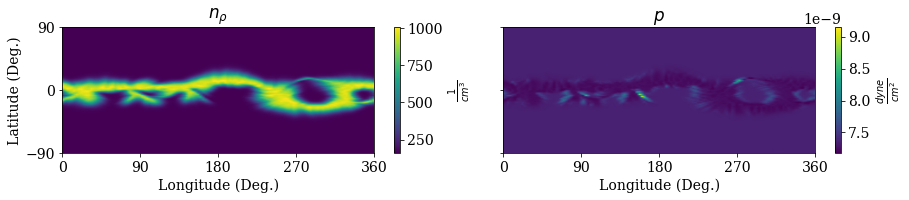

In [12]:
fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(13, 3))

pos = ax[0].pcolormesh(180 / np.pi * PHI, 180 / np.pi * THETA,
                       (rho[:, :,0].T/m_p.value*1/u.km**3).to(1/u.cm**3), shading='gouraud',
                       cmap="viridis")
cbar = fig.colorbar(pos, ax=ax[0])
cbar.ax.set_ylabel(r'$\frac{1}{cm^3}$', rotation=90, fontsize=14)
ax[0].set_title(r"$n_{\rho}$")

pos = ax[1].pcolormesh(180 / np.pi * PHI, 180 / np.pi * THETA,
                       (Pr[:, :, 1].T).to(u.dyne / u.cm**2),
                       shading='gouraud',
                       cmap="viridis")

cbar = fig.colorbar(pos, ax=ax[1])
cbar.ax.set_ylabel(r'$\frac{dyne}{cm^2}$', rotation=90, fontsize=14)
ax[1].set_title(r"$p$")

ax[1].set_xticks([0, 90, 180, 270, 360])
ax[1].set_yticks([-90, 0, 90])
ax[1].set_xlabel("Longitude (Deg.)")
ax[0].set_xlabel("Longitude (Deg.)")
ax[0].set_ylabel("Latitude (Deg.)")
plt.tight_layout()

plt.savefig("figs/boundary_conditions_at_30rs_np_p.png", dpi=600)

# Numerical Implementation

# Initialize Primitive Variables

In [13]:
r = (model["vr"].r_coords * u.solRad).to(u.km)

idx = 1

new_r = np.linspace(r[idx], r[-1], int(1000))
# change in r
dr = new_r[1] - new_r[0]

U_SOL = np.zeros((5, len(p), len(t), len(new_r)))
U_SOL[:, :, :, 0] = np.array((vr[:, :, idx]*(1 + 0.25*np.exp(-30/50)),
                              rho[:, :, idx],
                              Pr[:, :, idx]*(1e-2),
                              vp[:, :, idx],#*(1 + 0.25*np.exp(-30/50)),
                              vt[:, :, idx]))#*(1 + 0.25*np.exp(-30/50))))

In [14]:
# define mesh grid
PHI, THETA = np.meshgrid(p, np.linspace(0.05, np.pi-0.05, len(t)))

# numerically propagte in the radial direction.
for ii in range(len(new_r) -1):
    U_SOL[:, :, :, ii + 1] = pizzo_maccormack(U=U_SOL[:, :, :, ii],
                                              dr=dr,
                                              dp=dp,
                                              dt=dt,
                                              r=new_r[ii],
                                              THETA=THETA.T)
    if ii % 50 == 0:
        print(ii)

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950


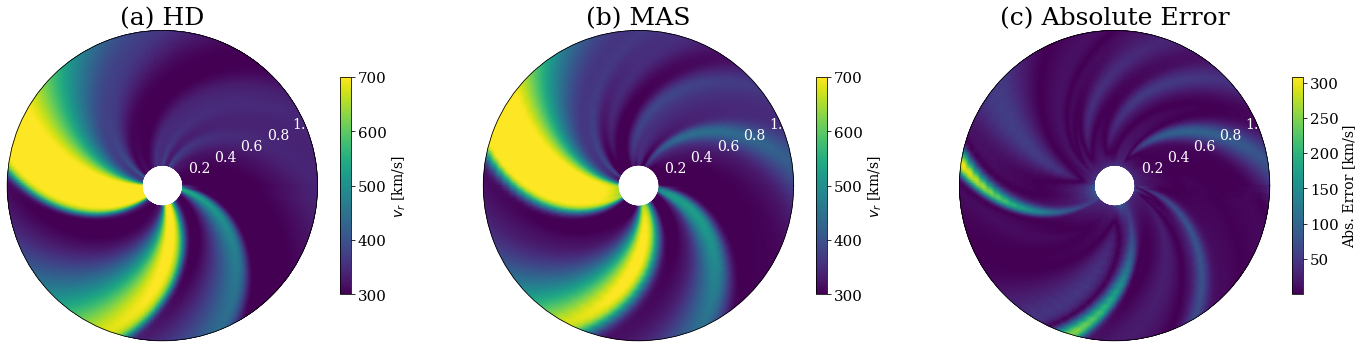

In [17]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5), subplot_kw={'projection': 'polar'})

ax[0].set_rlim(0)
ax[0].set_thetalim(0, 2 * np.pi)
ax[0].set_xticks([])
ax[0].set_ylim(0,1.1)
rlabels = ax[0].get_ymajorticklabels()
for label in rlabels:
    label.set_color('white')

pos = ax[0].pcolormesh(p, new_r.to(u.AU).value, U_SOL[0, :, len(t)//2, :].T, vmin=300, vmax=700, shading='gouraud', cmap="viridis")
ax[0].set_title("(a) HD", fontsize=25)
cbar = fig.colorbar(pos, ax=ax[0], orientation="vertical", shrink=0.7)
cbar.ax.set_ylabel(r'$v_{r}$' +  ' [km/s]', rotation=90, fontsize=14)
cbar.ax.tick_params(labelsize=15)

ax[1].set_rlim(0)
ax[1].set_thetalim(0, 2 * np.pi)
ax[1].set_xticks([])
ax[1].set_ylim(0,1.1)
rlabels = ax[1].get_ymajorticklabels()
for label in rlabels:
    label.set_color('white')

pos = ax[1].pcolormesh(p, r[idx:].to(u.AU).value, vr[:, len(t)//2, idx:].T, vmin=300, vmax=700, shading='gouraud', cmap="viridis")
ax[1].set_title(r"(b) MAS", fontsize=25)
cbar = fig.colorbar(pos, ax=ax[1], orientation="vertical", shrink=0.7)
cbar.ax.set_ylabel(r'$v_{r}$' +  ' [km/s]', rotation=90, fontsize=14)
cbar.ax.tick_params(labelsize=15)


data_vr_new_r = interpolate_initial_condition(data=vr[:, :, idx:], 
                                       p_coord=p, 
                                       t_coord=t, 
                                       r_coord=r[idx:].to(u.AU), 
                                       p_interp=p,
                                       t_interp=t,
                                       r_interp=new_r.to(u.AU).value)

ax[2].set_rlim(0)
ax[2].set_thetalim(0, 2 * np.pi)
ax[2].set_xticks([])
ax[2].set_ylim(0,1.1)
rlabels = ax[2].get_ymajorticklabels()
for label in rlabels:
    label.set_color('white')

pos = ax[2].pcolormesh(p, new_r.to(u.AU).value, 
                       np.abs(data_vr_new_r[:, len(t)//2, :] - U_SOL[0, :, len(t)//2, :]).T, 
                       shading='gouraud', cmap="viridis")
ax[2].set_title(r"(c) Absolute Error", fontsize=25)
cbar = fig.colorbar(pos, ax=ax[2], orientation="vertical", shrink=0.7)
cbar.ax.set_ylabel(r'Abs. Error [km/s]', rotation=90, fontsize=14)
cbar.ax.tick_params(labelsize=15)

plt.tight_layout()
plt.savefig("figs/three_velocities_HD_Pizzo.png", dpi=600)

KeyboardInterrupt: 

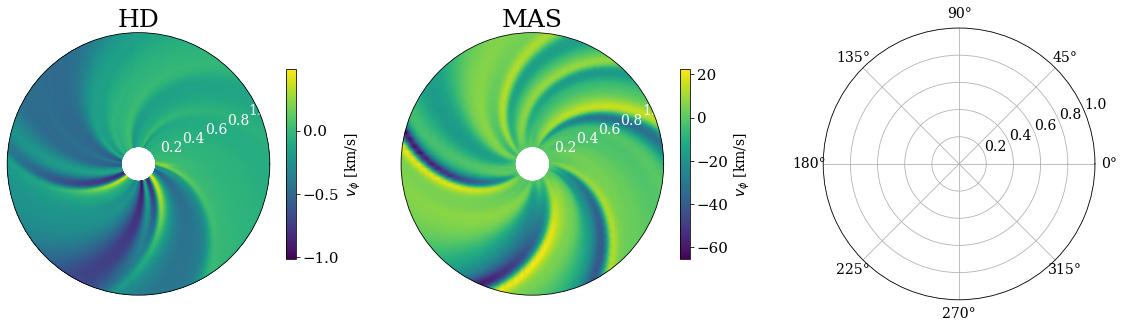

In [16]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5), subplot_kw={'projection': 'polar'})

ax[0].set_rlim(0)
ax[0].set_thetalim(0, 2 * np.pi)
ax[0].set_xticks([])
ax[0].set_ylim(0,1.1)
rlabels = ax[0].get_ymajorticklabels()
for label in rlabels:
    label.set_color('white')

pos = ax[0].pcolormesh(p, new_r.to(u.AU).value, U_SOL[3, :, len(t)//2, :].T,  shading='gouraud', cmap="viridis")
ax[0].set_title("HD", fontsize=25)
cbar = fig.colorbar(pos, ax=ax[0], orientation="vertical", shrink=0.7)
cbar.ax.set_ylabel(r'$v_{\phi}$' +  ' [km/s]', rotation=90, fontsize=14)
cbar.ax.tick_params(labelsize=15)

ax[1].set_rlim(0)
ax[1].set_thetalim(0, 2 * np.pi)
ax[1].set_xticks([])
ax[1].set_ylim(0,1.1)
rlabels = ax[1].get_ymajorticklabels()
for label in rlabels:
    label.set_color('white')

pos = ax[1].pcolormesh(p, r[idx:].to(u.AU).value, vp[:, len(t)//2, 1+idx:].T,shading='gouraud', cmap="viridis")
ax[1].set_title(r"MAS", fontsize=25)
cbar = fig.colorbar(pos, ax=ax[1], orientation="vertical", shrink=0.7)
cbar.ax.set_ylabel(r'$v_{\phi}$' +  ' [km/s]', rotation=90, fontsize=14)
cbar.ax.tick_params(labelsize=15)


data_vp_new_r = interpolate_initial_condition(data=vp[:, :, idx+1:], 
                                       p_coord=p, 
                                       t_coord=t, 
                                       r_coord=r[idx:].to(u.AU), 
                                       p_interp=p,
                                       t_interp=t,
                                       r_interp=new_r.to(u.AU).value)

ax[2].set_rlim(0)
ax[2].set_thetalim(0, 2 * np.pi)
ax[2].set_xticks([])
ax[2].set_ylim(0,1.1)
rlabels = ax[2].get_ymajorticklabels()
for label in rlabels:
    label.set_color('white')

pos = ax[2].pcolormesh(p, new_r.to(u.AU).value, 
                       (np.abs(data_vp_new_r[:, len(t)//2, :] - U_SOL[3, :, len(t)//2, :])).T, 
                       shading='gouraud', cmap="viridis")
ax[2].set_title(r"Absolute Error", fontsize=25)
cbar = fig.colorbar(pos, ax=ax[2], orientation="vertical", shrink=0.7)
cbar.ax.set_ylabel(r'Abs. Error [km/s] ', rotation=90, fontsize=14)
cbar.ax.tick_params(labelsize=15)

plt.tight_layout()
#plt.savefig("figs/three_velocities_HD_Pizzo.png", dpi=600)

In [ ]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5), subplot_kw={'projection': 'polar'})

ax[0].set_rlim(0)
ax[0].set_thetalim(0, 2 * np.pi)
ax[0].set_xticks([])
ax[0].set_ylim(0,1.1)
rlabels = ax[0].get_ymajorticklabels()
for label in rlabels:
    label.set_color('white')

pos = ax[0].pcolormesh(p, new_r.to(u.AU).value,
                       (U_SOL[1, :, len(t)//2, :].T/m_p.value*1/u.km**3).to(1/u.cm**3),  vmin=0, vmax=800, shading='gouraud', cmap="viridis")
ax[0].set_title("HD", fontsize=25)
cbar = fig.colorbar(pos, ax=ax[0], orientation="vertical", shrink=0.7)
cbar.ax.set_ylabel(r'$n_{p}$' +  ' [1/$cm^3$]', rotation=90, fontsize=14)
cbar.ax.tick_params(labelsize=15)

ax[1].set_rlim(0)
ax[1].set_thetalim(0, 2 * np.pi)
ax[1].set_xticks([])
ax[1].set_ylim(0,1.1)
rlabels = ax[1].get_ymajorticklabels()
for label in rlabels:
    label.set_color('white')

pos = ax[1].pcolormesh(p, r[idx:].to(u.AU).value, 
                       (rho[:, len(t)//2, idx+1:].T/m_p.value*1/u.km**3).to(1/u.cm**3), vmin=0, vmax=800, shading='gouraud', cmap="viridis")
ax[1].set_title(r"MAS", fontsize=25)
cbar = fig.colorbar(pos, ax=ax[1], orientation="vertical", shrink=0.7)
cbar.ax.set_ylabel(r'$n_{p}$' +  ' [1/$cm^3$]', rotation=90, fontsize=14)
cbar.ax.tick_params(labelsize=15)


data_rho_new_r = interpolate_initial_condition(data=rho[:, :, 1+idx:], 
                                       p_coord=p, 
                                       t_coord=t, 
                                       r_coord=r[idx:].to(u.AU), 
                                       p_interp=p,
                                       t_interp=t,
                                       r_interp=new_r.to(u.AU).value)

ax[2].set_rlim(0)
ax[2].set_thetalim(0, 2 * np.pi)
ax[2].set_xticks([])
ax[2].set_ylim(0,1.1)
rlabels = ax[2].get_ymajorticklabels()
for label in rlabels:
    label.set_color('white')

pos = ax[2].pcolormesh(p, new_r.to(u.AU).value, 
                       ((np.abs(data_rho_new_r[:, len(t)//2, :] - U_SOL[1, :, len(t)//2, :])).T/m_p.value*1/u.km**3).to(1/u.cm**3),        
                       shading='gouraud', cmap="viridis")
ax[2].set_title(r"Absolute Error", fontsize=25)
cbar = fig.colorbar(pos, ax=ax[2], orientation="vertical", shrink=0.7)
cbar.ax.set_ylabel(r'Abs. Error  [1/$cm^3$]', rotation=90, fontsize=14)
cbar.ax.tick_params(labelsize=15)

plt.tight_layout()
#plt.savefig("figs/three_velocities_HD_Pizzo.png", dpi=600)

In [ ]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5), subplot_kw={'projection': 'polar'})

ax[0].set_rlim(0)
ax[0].set_thetalim(0, 2 * np.pi)
ax[0].set_xticks([])
ax[0].set_ylim(0,1.1)
rlabels = ax[0].get_ymajorticklabels()
for label in rlabels:
    label.set_color('white')

pos = ax[0].pcolormesh(p, new_r.to(u.AU).value,
                       (1e2*U_SOL[2, :, len(t)//2, :].T * u.kg/(u.s**2 * u.km)).to(u.dyne/u.cm**2),  shading='gouraud', cmap="viridis")
ax[0].set_title("HD", fontsize=25)
cbar = fig.colorbar(pos, ax=ax[0], orientation="vertical", shrink=0.7)
cbar.ax.set_ylabel(r'$p$' +  ' [dyne/$cm^2$]', rotation=90, fontsize=14)
cbar.ax.tick_params(labelsize=15)

ax[1].set_rlim(0)
ax[1].set_thetalim(0, 2 * np.pi)
ax[1].set_xticks([])
ax[1].set_ylim(0,1.1)
rlabels = ax[1].get_ymajorticklabels()
for label in rlabels:
    label.set_color('white')

pos = ax[1].pcolormesh(p, r[idx:].to(u.AU).value, 
                       (Pr[:, len(t)//2, idx+1:].T).to(u.dyne/u.cm**2), shading='gouraud', cmap="viridis")
ax[1].set_title(r"MAS", fontsize=25)
cbar = fig.colorbar(pos, ax=ax[1], orientation="vertical", shrink=0.7)
cbar.ax.set_ylabel(r'$p$' +  ' [dyne/$cm^2$]', rotation=90, fontsize=14)
cbar.ax.tick_params(labelsize=15)


data_Pr_new_r = interpolate_initial_condition(data=Pr[:, :, 1+idx:], 
                                       p_coord=p, 
                                       t_coord=t, 
                                       r_coord=r[idx:].to(u.AU), 
                                       p_interp=p,
                                       t_interp=t,
                                       r_interp=new_r.to(u.AU).value)

ax[2].set_rlim(0)
ax[2].set_thetalim(0, 2 * np.pi)
ax[2].set_xticks([])
ax[2].set_ylim(0,1.1)
rlabels = ax[2].get_ymajorticklabels()
for label in rlabels:
    label.set_color('white')

pos = ax[2].pcolormesh(p, new_r.to(u.AU).value, 
                       ((np.abs(data_Pr_new_r[:, len(t)//2, :] - 1e2*U_SOL[2, :, len(t)//2, :])).T*u.kg/(u.s**2 * u.km)).to(u.dyne/u.cm**2),        
                       shading='gouraud', cmap="viridis")
ax[2].set_title(r"Absolute Error", fontsize=25)
cbar = fig.colorbar(pos, ax=ax[2], orientation="vertical", shrink=0.7)
cbar.ax.set_ylabel(r'Abs. Error  [dyne/$cm^2$]', rotation=90, fontsize=14)
cbar.ax.tick_params(labelsize=15)